The website based off this data is hosted at https://cf-to-atcoder.vercel.app/.  

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
url='https://drive.google.com/file/d/1XMb_xYLl9jiaNNcQHdMDpSXOPlWBl3Kw/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df=pd.read_csv(url)
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
df=df.iloc[1:]
df.rename(columns={'Unnamed: 0': 'atcoder id', 'Unnamed: 1': 'atcoder rating','Unnamed: 2':'cf id','Unnamed: 3':'cf rating'}, inplace=True)
df.head()

,atcoder id,atcoder rating,cf id,cf rating
3,tourist,4229,tourist,3843
4,ksun48,3802,ksun48,3376
5,zhoukangyang,3640,zhoukangyang,3571
6,ecnerwala,3814,ecnerwala,3499
7,Um_nik,3948,Um_nik,3352


In [16]:
df['atcoder rating'] = df['atcoder rating'].astype('float')
df['cf rating'] = df['cf rating'].astype('float')

In [17]:
df = df[abs(df['cf rating'] - df['atcoder rating']) < 1000]
# print(abs(df['atcoder rating']-df['cf rating'])<2000)
print(df)

         atcoder id  atcoder rating           cf id  cf rating
3           tourist          4229.0         tourist     3843.0
4            ksun48          3802.0          ksun48     3376.0
5      zhoukangyang          3640.0    zhoukangyang     3571.0
6         ecnerwala          3814.0       ecnerwala     3499.0
7            Um_nik          3948.0          Um_nik     3352.0
...             ...             ...             ...        ...
6084      ilijaIR13           913.0   ilijaIR1331IR     1275.0
6085  laksh02balani           753.0   laksh02balani     1331.0
6086        moyifan           753.0         moyifan     1265.0
6087   offamitkumar           854.0      hello_hell     1280.0
6088        sahilgo           753.0  sahilgoyal6801     1423.0

[5937 rows x 4 columns]


Use LinearRegression through gradient descent. So as to try and minmize the cost function which in this case is MSE.

In [30]:
class Linear_Regression:

    def __init__(self, X, Y):
        self.X = X
        self.Y = Y
        self.b = [0, 0]
    # b[0] here is intercept and b[1] is slope of the line

    def update_coeffs(self, learning_rate):
        Y_pred = self.predict()
        Y = self.Y
        m = len(Y)
        self.b[0] = self.b[0] - (learning_rate * ((1/m) *
                                                  np.sum(Y_pred - Y)))
        
        self.b[1] = self.b[1] - (learning_rate * ((1/m) *
                                                  np.sum((Y_pred - Y) * self.X)))

    def get_coeff_and_intercept(self):
        return self.b
    
    def predict(self, X=[]):
        Y_pred = np.array([])
        if not X:
            X = self.X
        b = self.b
        for x in X:
            Y_pred = np.append(Y_pred, b[0] + (b[1] * x))

        return Y_pred

    def compute_cost(self, Y_pred):
        m = len(self.Y)
        J = (1 / 2*m) * (np.sum(Y_pred - self.Y)**2)
        return J

    def plot_best_fit(self, Y_pred, fig):
        f = plt.figure(fig)
        plt.scatter(self.X, self.Y, color='b')
        plt.plot(self.X, Y_pred, color='g')
        plt.xlabel('atcoder rating')
        plt.ylabel('cf rating')
        plt.title('Linear Regression')
        # f.show()

# Accurace function to choose the better out of the result.

def accuracy(y, Y_pred):
    p, e = Y_pred, list(y)
    n = len(Y_pred)
    # print(len(p),e,p)
    ans = 0
    for i in range(n):
        if(e[i]!=0):
            ans += (abs(p[i]-e[i])/e[i])
    return 1-(ans/n)

In [19]:
X = df['atcoder rating'].astype(float)
Y = df['cf rating'].astype(float)
# print(x_train,y_train)
# print(0*X+0)

1 epochs elapsed
Current accuracy is : 0.2523650465814793
2 epochs elapsed
Current accuracy is : 0.4334522788617835
3 epochs elapsed
Current accuracy is : 0.5618941721786517
4 epochs elapsed
Current accuracy is : 0.6530684897268455
5 epochs elapsed
Current accuracy is : 0.715172946189752
6 epochs elapsed
Current accuracy is : 0.7548908741674261
7 epochs elapsed
Current accuracy is : 0.7789662767112142
8 epochs elapsed
Current accuracy is : 0.7929791547501734
9 epochs elapsed
Current accuracy is : 0.8008149852061177
10 epochs elapsed
Current accuracy is : 0.8050831391170444
11 epochs elapsed
Current accuracy is : 0.8074459660191872
12 epochs elapsed
Current accuracy is : 0.8087654681832599
13 epochs elapsed
Current accuracy is : 0.8095188818052942
14 epochs elapsed
Current accuracy is : 0.8099700431492598
15 epochs elapsed
Current accuracy is : 0.8102347562966765
16 epochs elapsed
Current accuracy is : 0.8103995748892427
17 epochs elapsed
Current accuracy is : 0.8105032986629253
18 epoc

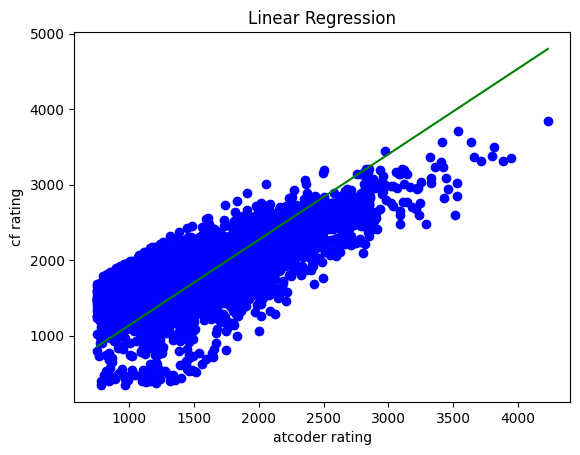

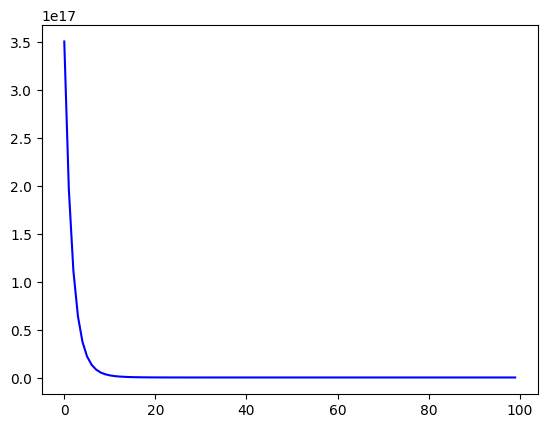

In [31]:
regressor = Linear_Regression(X, Y)

iterations = 0
learning_rate = 0.0000001
costs = []

# original best-fit line
Y_pred = regressor.predict()
# regressor.plot_best_fit(Y_pred, 'Initial Best Fit Line')



while iterations<100:
    Y_pred = regressor.predict()
    cost = regressor.compute_cost(Y_pred)
    costs.append(cost)
    regressor.update_coeffs(learning_rate)

    iterations += 1
    # if iterations % steps == 0:
    print(iterations, "epochs elapsed")
    # print(Y_pred)
    print("Current accuracy is :",
          accuracy(Y,list(regressor.predict())))
    

regressor.plot_best_fit(Y_pred,"fit")



h = plt.figure('Verification')
plt.plot(range(iterations), costs, color='b')

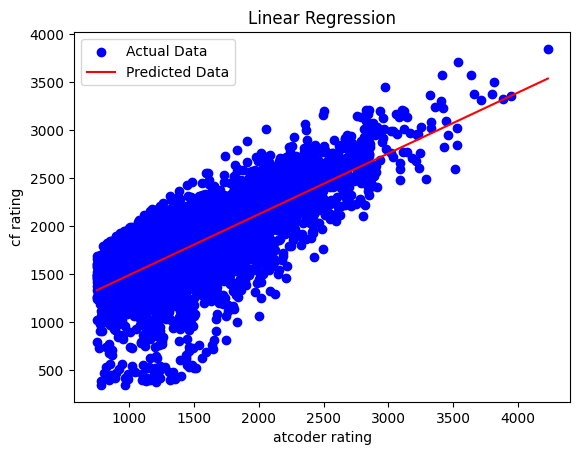

In [32]:
from sklearn.linear_model import LinearRegression

# Create a linear regression object
reg = LinearRegression()

# Fit the model using X and Y
reg.fit(X.values.reshape(-1, 1), Y.values.reshape(-1, 1))

# Predict the values
import matplotlib.pyplot as plt

# print(reg.predict(X.values.reshape(-1, 1)))
# Plot the data
plt.scatter(X, Y, color='b', label='Actual Data')
plt.plot(X, reg.predict(X.values.reshape(-1, 1)), color='r', label='Predicted Data')
plt.xlabel('atcoder rating')
plt.ylabel('cf rating')
plt.title('Linear Regression')
plt.legend()
plt.show()



In [33]:
print (accuracy(Y,reg.predict(X.values.reshape(-1, 1)))[0],'sklearn accuracy')
print(accuracy(Y,list(regressor.predict())),'gradient descent accuracy')

0.8681677061296893 sklearn accuracy
0.8107185026602847 gradient descent accuracy


well since sklearn has an higher accuracy let's use the coefficients from that.

In [38]:
reg.coef_,reg.intercept_,"sklearn coefficient and intercept"

(array([[0.6334027]]),
 array([856.05180115]),
 'sklearn coefficient and intercept')

In [39]:
regressor.get_coeff_and_intercept(),"gradient descent intercept and coefficient"

([0.0015150004720291077, 1.1347713880157542],
 'gradient descent coefficient and intercept')

Yes i do realise the data needs immense cleaning, yes it's a bit strange to get almost similar accuracy with such different coefficients but it has to do with the density of data in 1000-2000 range, and the fact that the data is not linearly distributed. but rather varies a lot on the same datapoint. This i hope to clean by rescraping the whole thing and including details of number of contests on both platforms we can then further filter the datapoints where the difference in number of contests is too high.